# Summarizing metrics from SDT horiz lines

Leanne Friedrich 5/4/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_horiz_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'HorizSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolderR
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnorma_adj, sup_dnormd, sup_dnormd_adj, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [10]:
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'horizSDTCorrs.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\horizSDTCorrs.csv


In [13]:
ms.keyTableVar('segments')

,1,2,3
wp,,,
wo,segments_w1o,segments_w2o,segments_w3o
wrelax,delta_segments_w1relax,delta_segments_w2relax,delta_segments_w3relax
write,,delta_segments_write2,
dp,,,
do,segments_d1o,segments_d2o,
drelax,delta_segments_d1relax,delta_segments_d2relax,
disturb,delta_segments_disturb1,delta_segments_disturb2,


In [7]:
ms.ss.ink_base.unique()

array(['PDMS_3', 'silicone oil'], dtype=object)

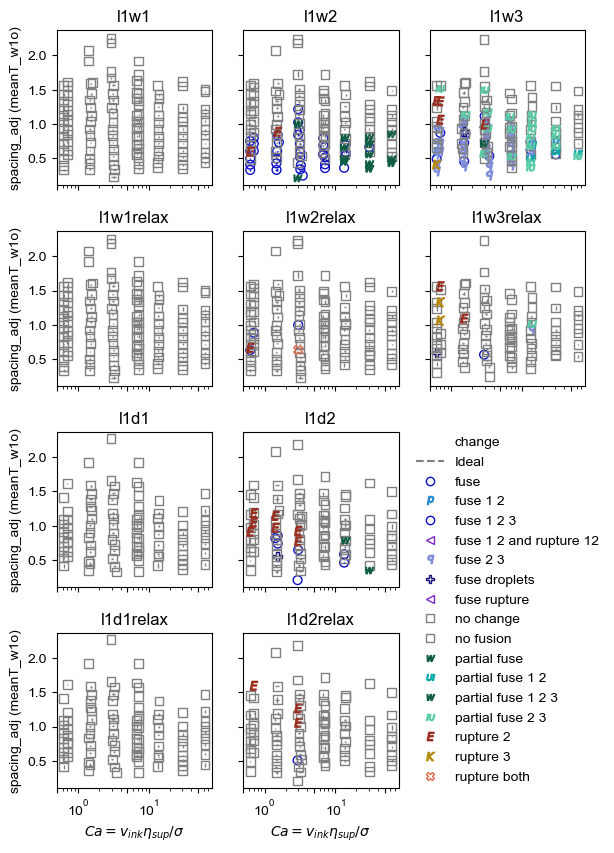

In [14]:
cvl = mp.qualityScatter(ms, ms.ss[ms.ss.spacing_adj<2.5], xvar='int_Ca', yvar='spacing_adj', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook')

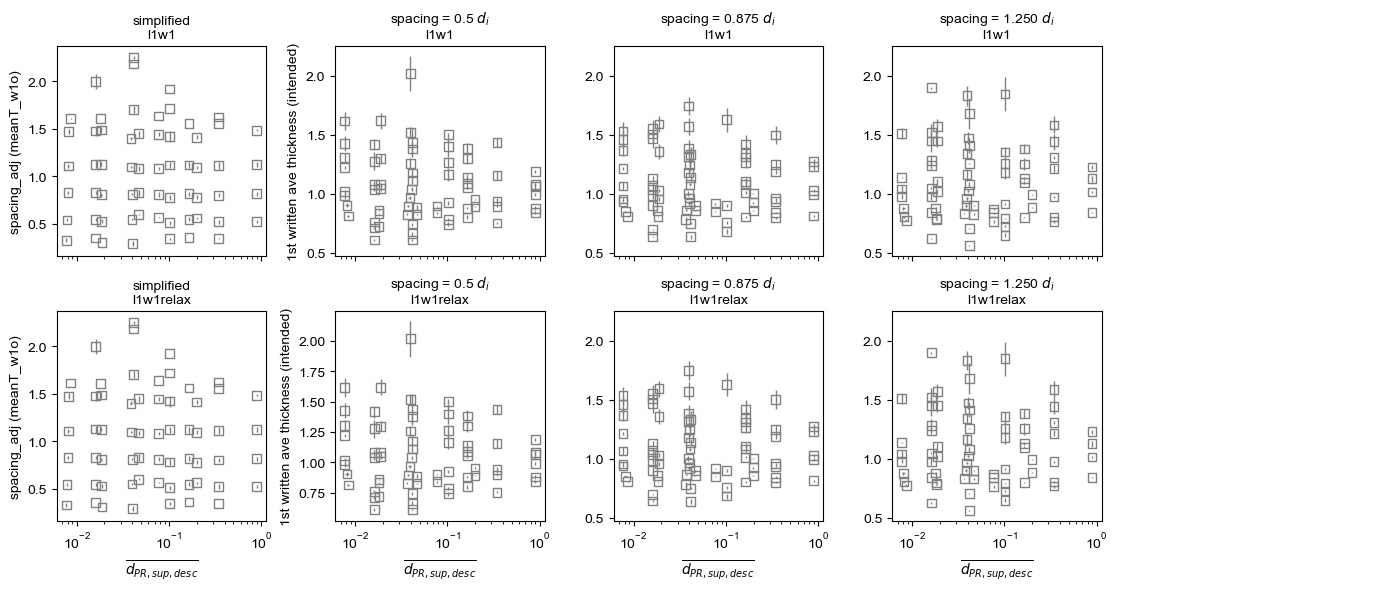

<Figure size 400x440 with 0 Axes>

In [13]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1w1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

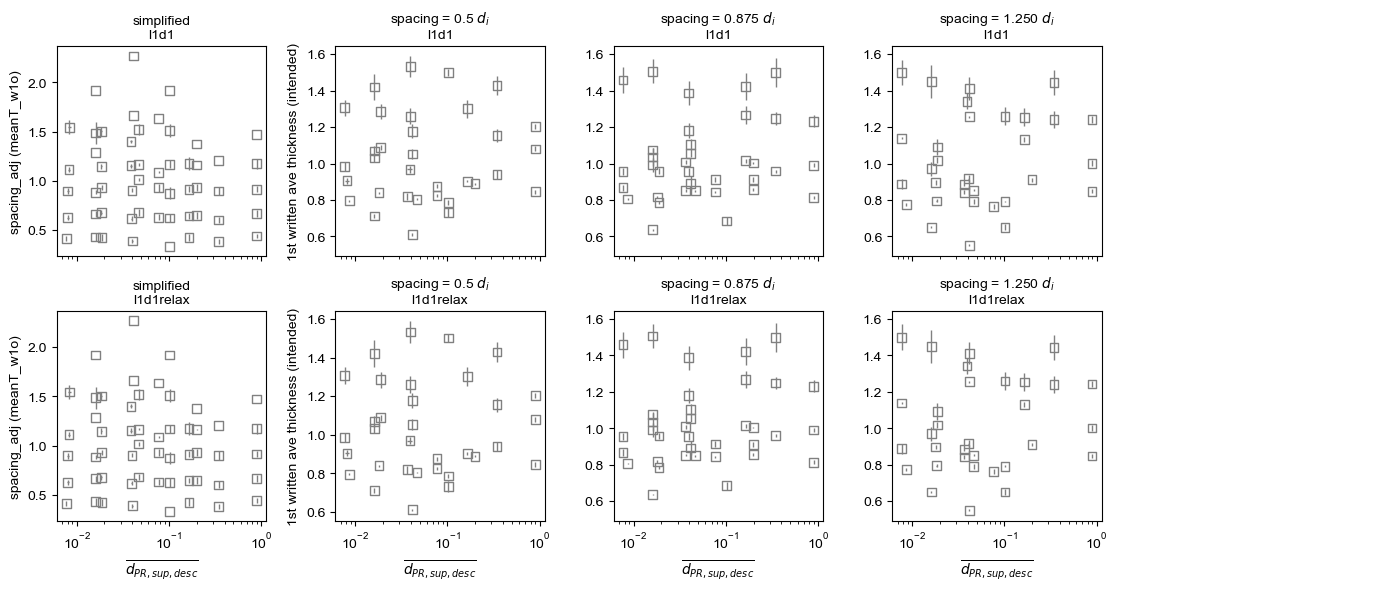

<Figure size 400x440 with 0 Axes>

In [15]:
cvld1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1d1_HOP.png and .svg


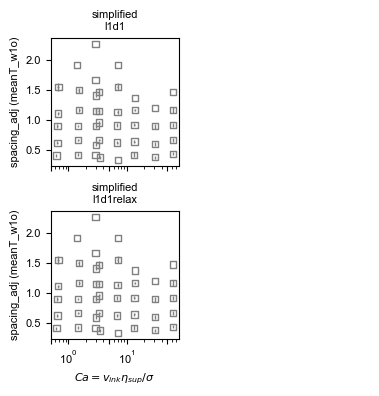

<Figure size 400x440 with 0 Axes>

In [4]:
qsd1 = mp.qualityScatterSimple(ms, ms.ss, 'int_Ca', 'spacing_adj', cvar0='l1d1', simplify=True, logx=True, plotType='paper', figsize=(4,4))
qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d1_HOP'))

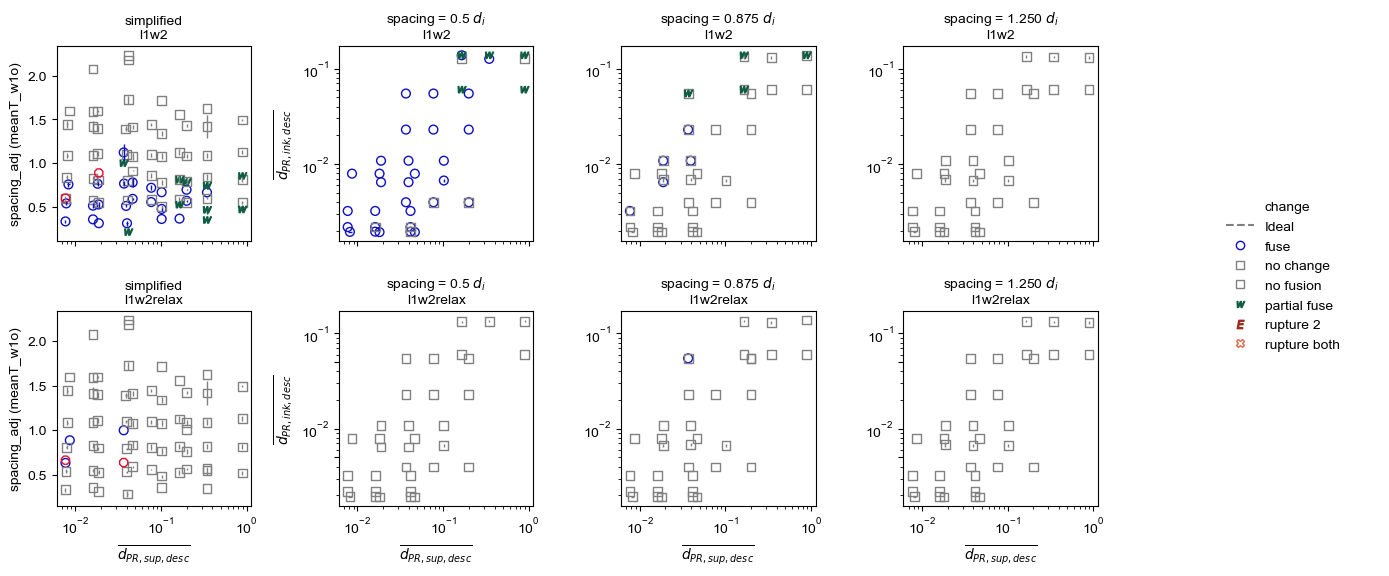

In [16]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

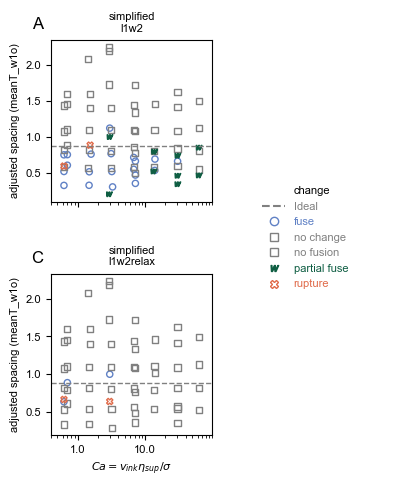

In [19]:
qsw2 = mp.qualityScatterSimple(ms, ms.ss, 'int_Ca', 'spacing_adj', cvar0='l1w2'
                               , simplify=True, logx=True, plotType='paper'
                               , figsize=(4,5), xlim=[0.4, 100], yideal=0.875)
#qsw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_HOP'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w2_HOP_tight.png and .svg


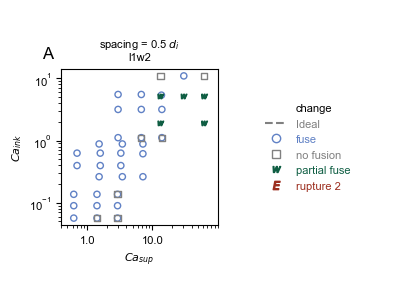

In [20]:
qsw2tight = mp.qualityScatterSimple(ms, ms.ss, 'sup_Ca', 'ink_Ca', cvar0='l1w2'
                               , simplify=False, logx=True, logy=True, plotType='paper', write=True, relax=False
                               , figsize=(4,3), xlim=[0.4, 100], spacing=0.5, dx=0.05, dy=0.05)
qsw2tight.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_HOP_tight'))

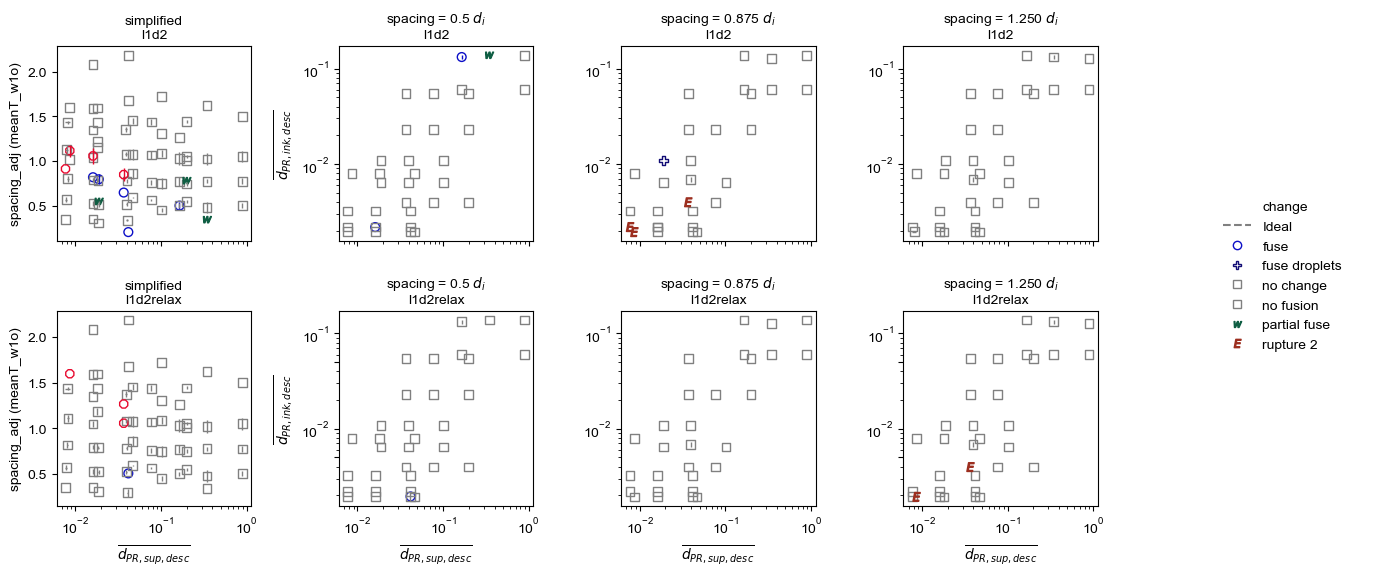

In [17]:
cvld2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1d2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

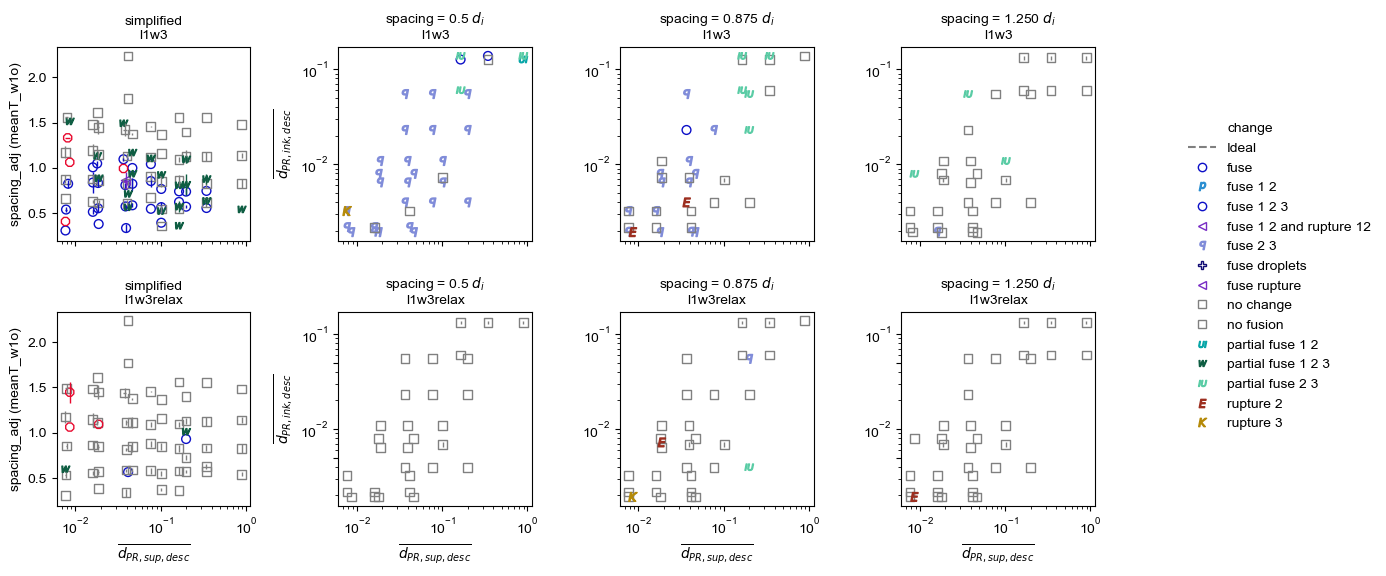

In [18]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w3', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [308]:
ms.ss[(ms.ss.l1w3=='fusion 2 3')]

,printFolderR,sup_Ca,ink_Ca,sup_dnorma,sup_dnormd,ink_dnorma,ink_dnormd,sup_We,ink_We,sup_Oh,...,l0w2,l0w2relax,l0d2,l0d2relax,l3w1,l3w1relax,l3w2,l3w2relax,l3d2,l3d2relax


In [307]:
ms.openFolder(211)

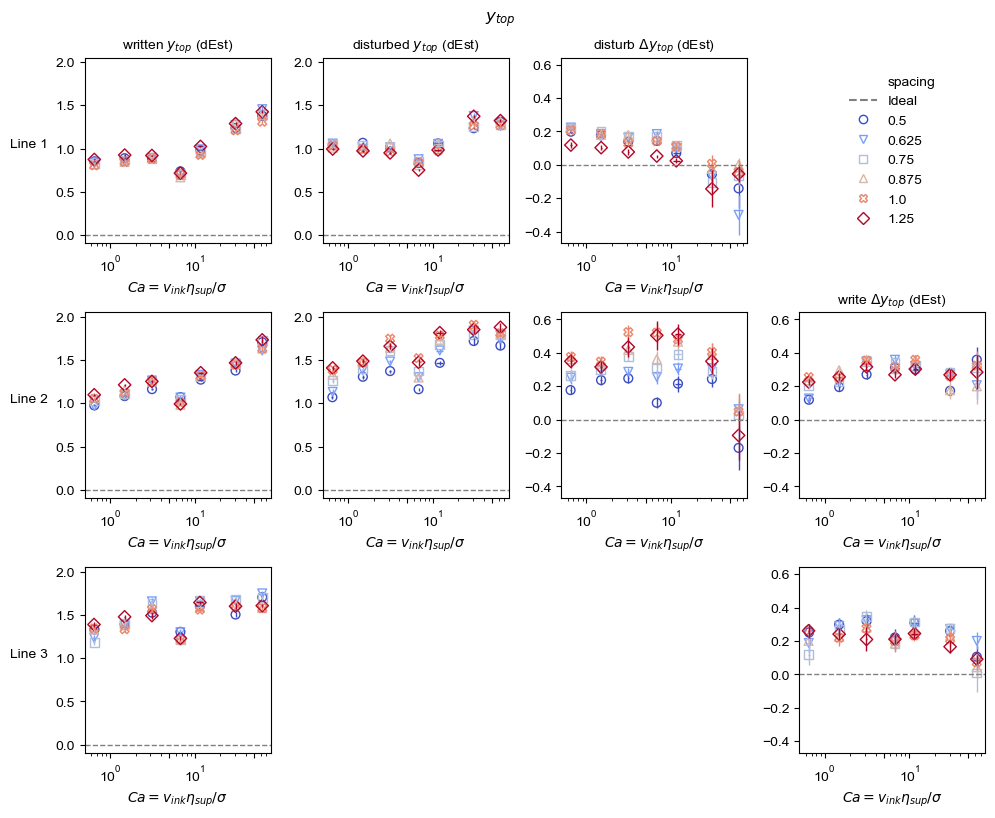

In [256]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='yTop', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

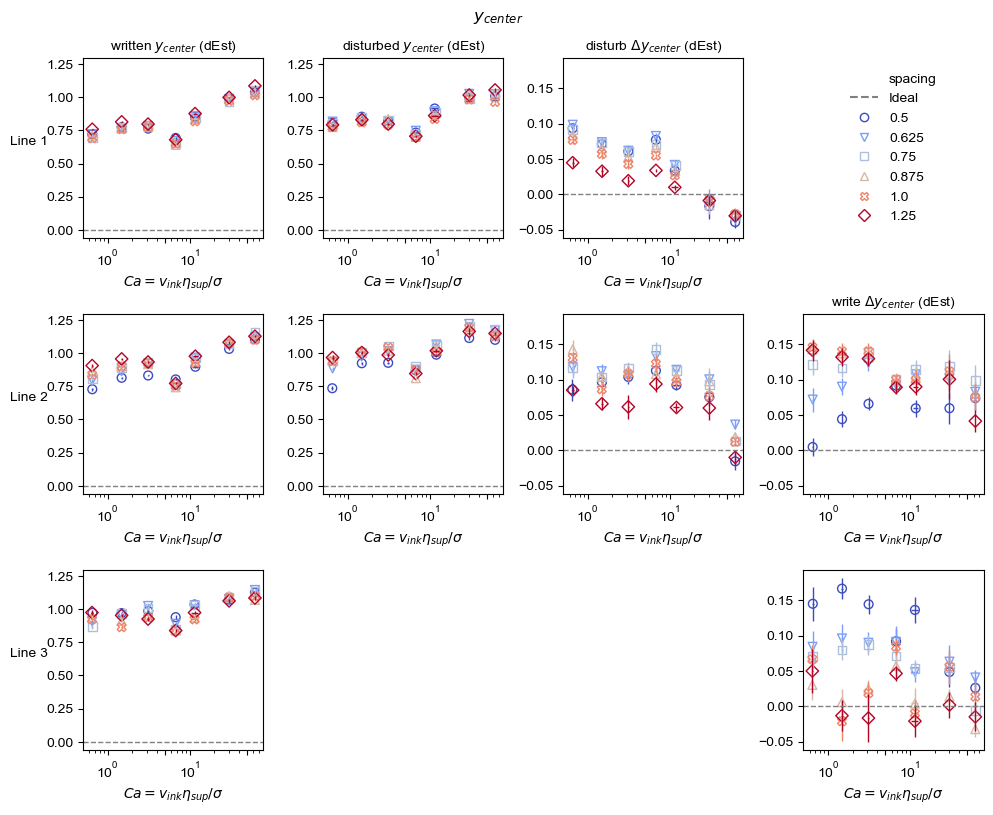

In [181]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='yc', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [285]:
ms.ss.ink_base.unique()

array(['PDMS_3', 'silicone oil'], dtype=object)

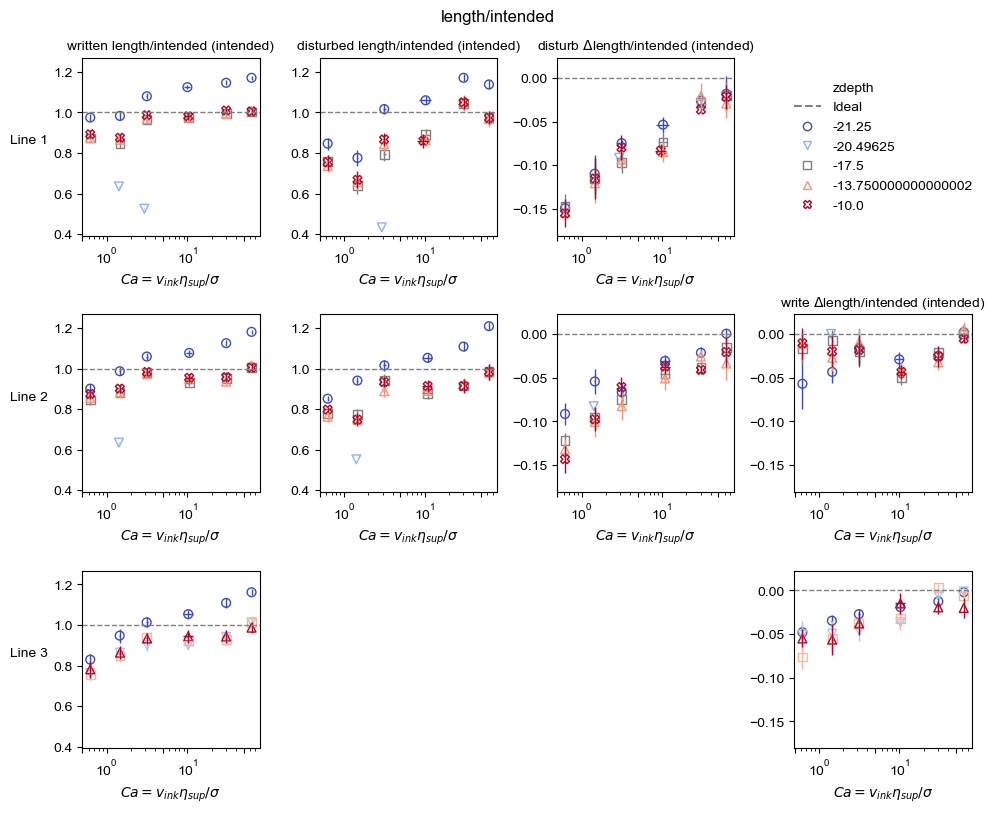

In [286]:
yvl = mp.yvarlines(ms, ms.ss[(ms.ss.spacing==1.25)&(ms.ss.ink_base=='silicone oil')], xvar='int_Ca', yvar='wn', cvar='zdepth', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [52]:
ms.reduceRows('delta_wn_disturb1', yvarmax=-0.05)

C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,ink_shortname,sup_shortname,int_Ca,spacing,delta_wn_disturb1
724,SO8-S85-0.05,3.0,1.53,0.62,-0.23
723,SO8-S85-0.05,3.0,1.53,0.50,-0.23
1,PDMSS10,3.0,0.70,0.62,-0.22
0,PDMSS10,3.0,0.70,0.50,-0.22
293,SO10,3.5,1.42,0.50,-0.22
725,SO8-S85-0.05,3.0,1.53,0.75,-0.22
419,SO9,3.0,0.62,0.50,-0.21
162,PDMSS6-S85-0.05,3.0,2.98,0.50,-0.21
2,PDMSS10,3.0,0.70,0.75,-0.21
420,SO9,3.0,0.62,0.62,-0.21


In [53]:
ms.openFolder(0)

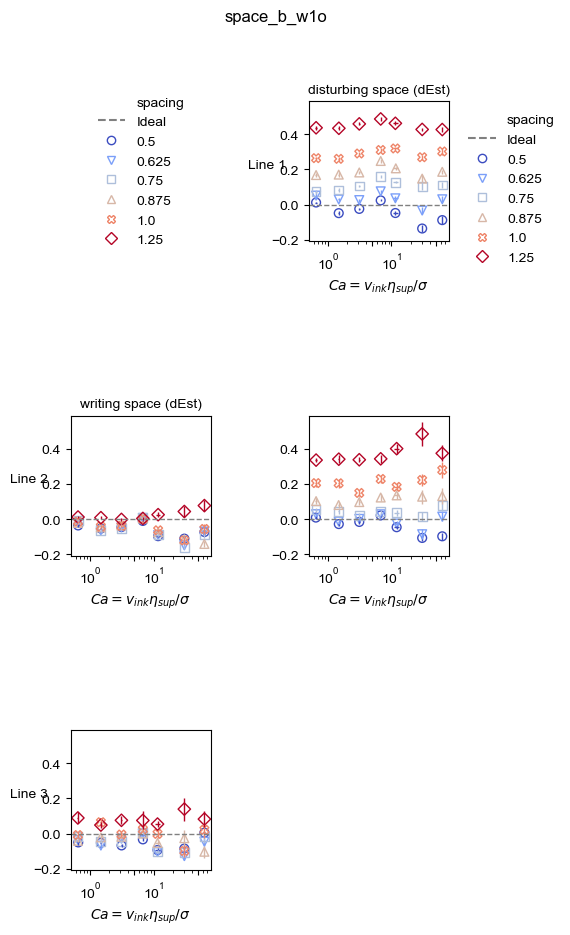

In [264]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='space_b', cvar='spacing', llist=[1, 2, 3]
             , plist=['wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

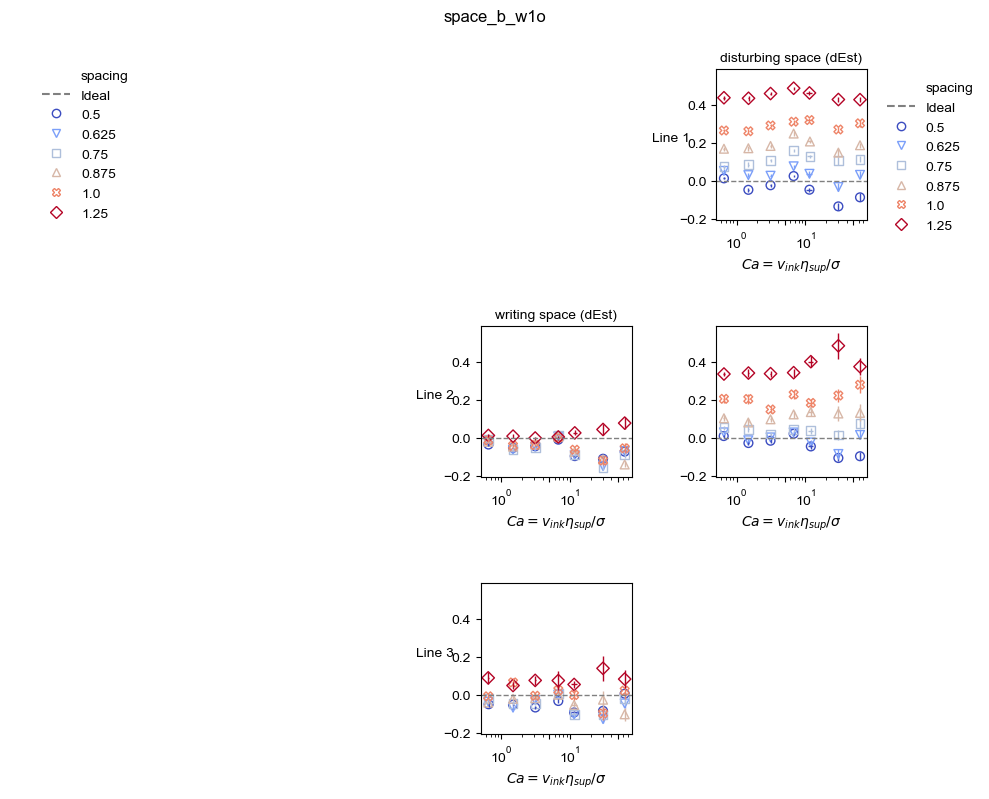

In [228]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='space_b', cvar='spacing', llist=[1, 2, 3]
             , plist=['dwdt', 'dddt', 'wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [64]:
ms.reduceRows('yTop_w2o', ms.ss.tau0aRatio<0.03 ,yvarmin=1);

,ink_shortname,sup_shortname,int_Ca,spacing,yTop_w2o
486,SO9,4.0,2.93,0.88,1.01
487,SO9,4.0,2.93,1.00,1.02
213,PDMSS6-S85-0.05,4.0,14.00,1.00,1.03
483,SO9,4.0,2.93,0.50,1.04
212,PDMSS6-S85-0.05,4.0,14.00,0.88,1.06
214,PDMSS6-S85-0.05,4.0,14.00,1.25,1.11
764,SO8-S85-0.05,4.0,7.17,0.50,1.20
210,PDMSS6-S85-0.05,4.0,14.00,0.62,1.24
766,SO8-S85-0.05,4.0,7.17,0.75,1.24
203,PDMSS6-S85-0.05,4.0,14.00,0.50,1.25


In [65]:
ms.openFolder(213)

# export plots

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\shrinkage_HOP.png and .svg


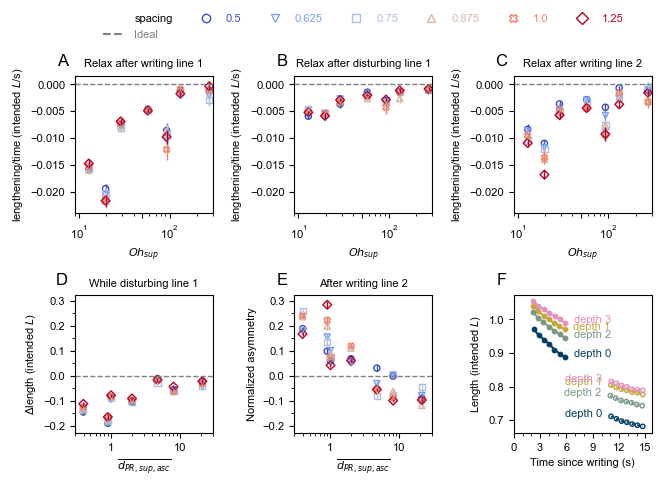

In [4]:
yvl = mp.shrinkagePlot(ms, r'SDT\PDMSS\I_PDMSS10_S_3.00\I_PDMSS10_S_3.00_230822\disturbHoriz3_1_0.500', export=True)
yvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\shift_HOP.png and .svg


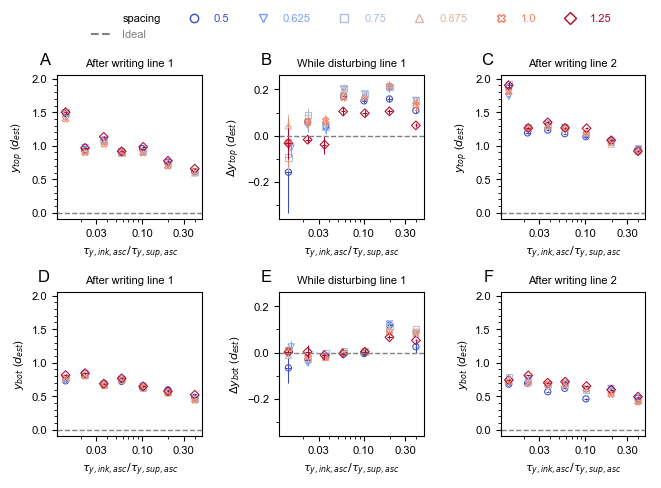

In [63]:
yvl = mp.shiftPlot(ms, 'HOP', export=True)
yvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\fusion_HOP.png and .svg


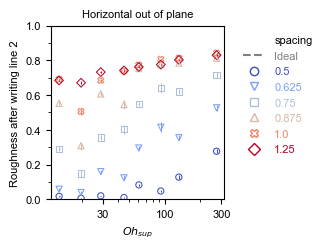

In [7]:
mp.fusionPlot(ms, 'HOP', export=True).fig

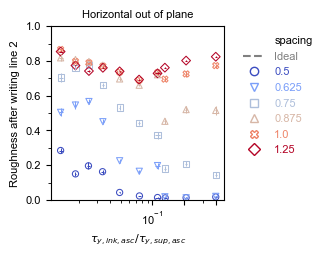

In [9]:
mp.fusionPlot(ms, 'HOP', export=False).fig

# export regressions

In [10]:
def exportRegression(var, **kwargs) -> None:
    mp.regressionTableSDT(ms, ms.ss, var, logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, tag='HOP', exportFolder=os.path.join(cfg.path.fig, 'SDT'))

In [29]:
# shrinkage
exportRegression('dwndt_w1o')
exportRegression('delta_wn_disturb1')
exportRegression('dwndt_d1o')
exportRegression('delta_wn_write2')
exportRegression('dwndt_w2o')
exportRegression('delta_wn_disturb2')
exportRegression('dwndt_d2o')
exportRegression('delta_wn_write3')
exportRegression('dwndt_w3o')
exportRegression('ldiff_w2o')
exportRegression('ldiff_w3o')

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1o_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1o_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\dwndt_w1o_HOP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb1_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb1_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\delta_wn_disturb1_HOP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1o_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1o_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/

In [30]:
# shifting
exportRegression('yBot_w1o')
exportRegression('yTop_w1o')

exportRegression('delta_yBot_disturb1')
exportRegression('delta_yBot_write2')
exportRegression('delta_yBot_disturb2')
exportRegression('delta_yBot_disturb2', Camax=1)
exportRegression('delta_yBot_write3')
exportRegression('delta_yBot_write3', Camax=1)


exportRegression('delta_yTop_disturb1')
exportRegression('delta_yTop_disturb2')
exportRegression('delta_yTop_disturb2', Camax=1)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\yBot_w1o_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\yBot_w1o_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\yBot_w1o_HOP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\yTop_w1o_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\yTop_w1o_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\yTop_w1o_HOP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_yBot_disturb1_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_yBot_disturb1_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/re

In [14]:
# shifting
exportRegression('roughness_w2o')
exportRegression('roughness_w2o', spacing=0.875)

exportRegression('emptiness_w2o')
exportRegression('emptiness_w2o', spacing=0.875)

exportRegression('segments_w2o')

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\roughness_w2o_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\roughness_w2o_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\roughness_w2o_HOP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\roughness_w2o_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\roughness_w2o_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\roughness_w2o_HOP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\emptiness_w2o_HOP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\emptiness_w2o_HOP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NI

## wn

,variable,Spearman coeff,Spearman p
0,spacing,0.00,8.9e-01
1,adjusted spacing,-0.01,8.7e-01
2,$Gta_{ink}/Gta_{sup}$,0.01,6.8e-01
3,$tGd_{ink}/tGd_{sup}$,-0.10,3.2e-03
4,$Ga_{ink}/Ga_{sup}$,-0.04,2.4e-01
5,$Gd_{ink}/Gd_{sup}$,-0.07,3.5e-02
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.22,5.0e-10
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.14,1.1e-04
8,$\bm{Ca}$,$\bm{0.56}$,$\bm{5.3e-70}$
9,$Ca_{ink}$,0.42,8.6e-36


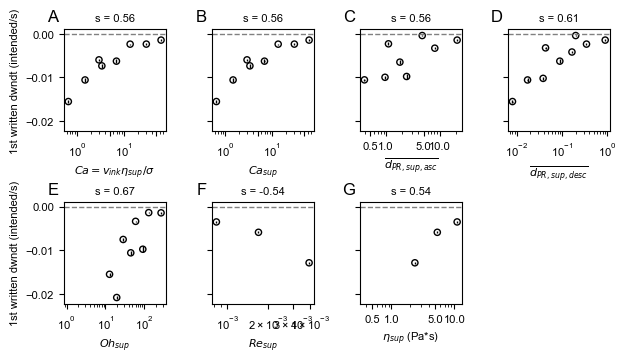

In [60]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w1o', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dwndt_d1oReg.png and .svg


,variable,Spearman coeff,Spearman p
0,spacing,-0.04,5.4e-01
1,adjusted spacing,-0.01,9.0e-01
2,$Gta_{ink}/Gta_{sup}$,-0.27,7.3e-06
3,$tGd_{ink}/tGd_{sup}$,-0.38,1.1e-10
4,$Ga_{ink}/Ga_{sup}$,-0.30,2.7e-07
5,$Gd_{ink}/Gd_{sup}$,-0.33,1.4e-08
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.36,4.4e-10
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.40,4.3e-12
8,$Ca$,0.43,4.6e-14
9,$Ca_{ink}$,0.14,2.4e-02


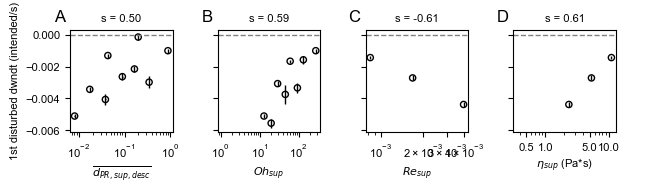

In [59]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d1o', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.07,2.4e-01
1,adjusted spacing,-0.04,4.8e-01
2,$Gta_{ink}/Gta_{sup}$,0.04,5.6e-01
3,$tGd_{ink}/tGd_{sup}$,-0.06,3.1e-01
4,$Ga_{ink}/Ga_{sup}$,-0.00,9.6e-01
5,$Gd_{ink}/Gd_{sup}$,-0.04,5.3e-01
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.23,1.0e-04
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.10,9.3e-02
8,$\bm{Ca}$,$\bm{0.66}$,$\bm{2.2e-35}$
9,$Ca_{ink}$,0.51,8.8e-20


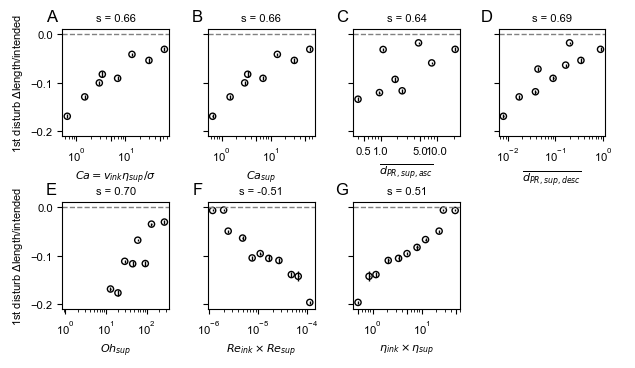

In [58]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb1', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.31,1.7e-13
1,adjusted spacing,-0.18,2.6e-05
2,$Gta_{ink}/Gta_{sup}$,-0.18,3.6e-05
3,$tGd_{ink}/tGd_{sup}$,-0.24,1.6e-08
4,$Ga_{ink}/Ga_{sup}$,-0.16,1.9e-04
5,$Gd_{ink}/Gd_{sup}$,-0.16,2.4e-04
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.01,8.5e-01
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.24,9.7e-09
8,$Ca$,-0.12,3.6e-03
9,$Ca_{ink}$,-0.13,2.6e-03


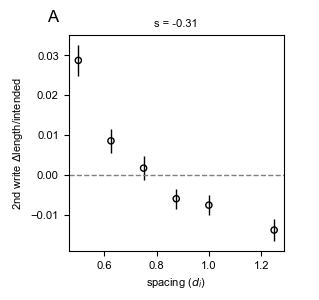

In [57]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write2', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w2oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w2oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dwndt_w2oReg.png and .svg


,variable,Spearman coeff,Spearman p
0,spacing,-0.16,1.9e-04
1,adjusted spacing,-0.08,7.0e-02
2,$Gta_{ink}/Gta_{sup}$,0.01,8.0e-01
3,$tGd_{ink}/tGd_{sup}$,-0.14,7.4e-04
4,$Ga_{ink}/Ga_{sup}$,-0.04,3.8e-01
5,$Gd_{ink}/Gd_{sup}$,-0.06,1.4e-01
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.12,6.0e-03
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.16,1.8e-04
8,$Ca$,0.44,9.7e-27
9,$Ca_{ink}$,0.33,5.2e-15


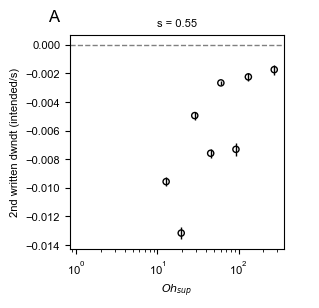

In [56]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w2o', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb2RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb2Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_wn_disturb2Reg.png and .svg


,variable,Spearman coeff,Spearman p
0,spacing,0.21,6.0e-04
1,adjusted spacing,0.11,6.3e-02
2,$Gta_{ink}/Gta_{sup}$,0.16,1.1e-02
3,$tGd_{ink}/tGd_{sup}$,0.06,3.6e-01
4,$Ga_{ink}/Ga_{sup}$,0.13,3.0e-02
5,$Gd_{ink}/Gd_{sup}$,0.10,9.9e-02
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.14,2.8e-02
7,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,0.01,8.3e-01
8,$\bm{Ca}$,$\bm{0.64}$,$\bm{6.6e-32}$
9,$\bm{Ca_{ink}}$,$\bm{0.59}$,$\bm{4.9e-26}$


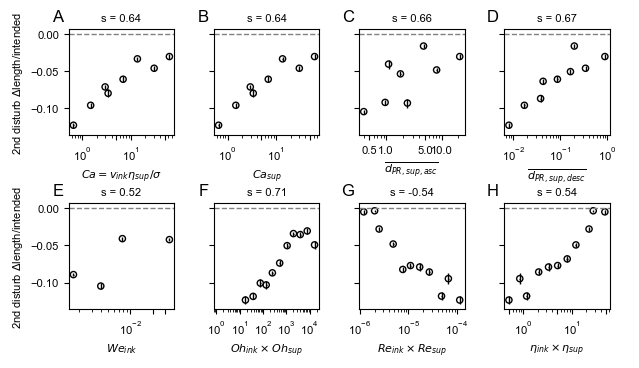

In [61]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb2', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Re_{sup}$,-0.50,8.3e-18
1,$\eta_{sup}$,0.50,8.3e-18


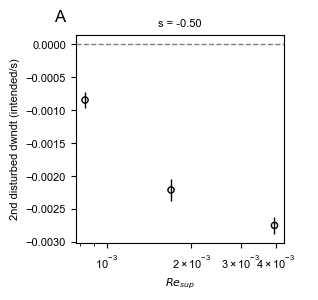

In [127]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
2,$\eta_{ink}\times \eta_{sup}$,0.46,8.7e-16


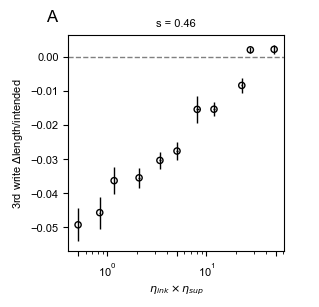

In [123]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,0.47,5.7e-17


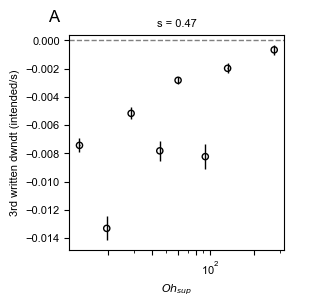

In [124]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.46,3.6e-03


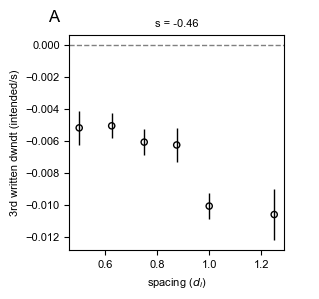

In [125]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'dwndt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## ldiff

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.72,1.1e-86
1,$Ca_{sup}$,-0.72,1.1e-86
2,$Ca_{ink}\times Ca_{sup}$,-0.66,1.5e-70
3,$\overline{d_{PR.sup.asc}}$,-0.68,6.4e-74
4,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.68,1.4e-74
5,$\overline{d_{PR.sup.desc}}$,-0.70,8.1e-82
6,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.70,1.6e-80
7,$We_{ink}$,-0.56,8.6e-47
8,$We_{sup}$,-0.53,3.8e-41
9,$We_{ink}\times We_{sup}$,-0.54,3.4e-43


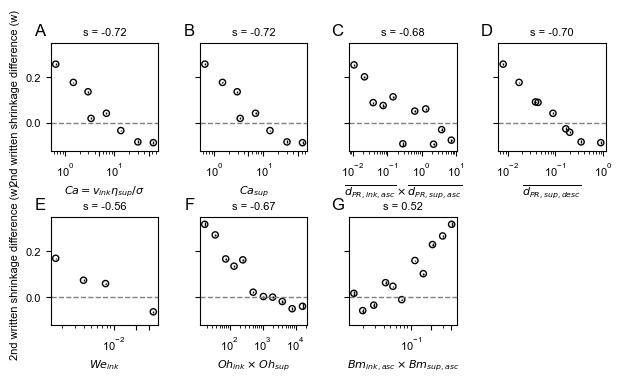

In [132]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.70,5.5e-40
1,$Ca_{sup}$,-0.70,5.5e-40
2,$Ca_{ink}\times Ca_{sup}$,-0.68,3.4e-37
3,$\overline{d_{PR.sup.asc}}$,-0.64,3.3e-31
4,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.67,6.3e-36
5,$\overline{d_{PR.ink.desc}}$,-0.71,1.2e-41
6,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.73,3.3e-44
7,$We_{ink}$,-0.63,5.7e-31
8,$We_{sup}$,-0.61,3.4e-28
9,$We_{ink}\times We_{sup}$,-0.62,4.1e-29


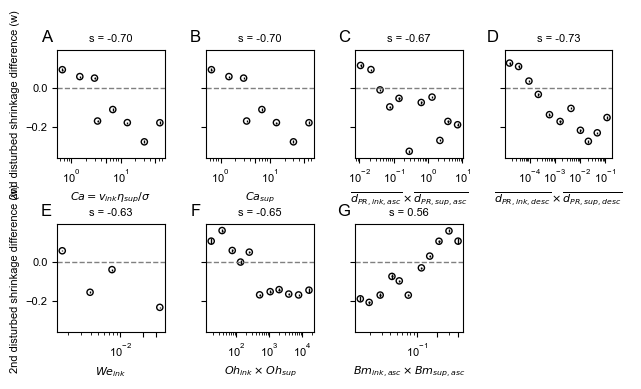

In [133]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.66,4.2e-37
1,$Ca_{sup}$,-0.66,4.2e-37
2,$\overline{d_{PR.sup.asc}}$,-0.60,7.0e-29
3,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.57,3.6e-25
4,$\overline{d_{PR.sup.desc}}$,-0.65,1.1e-35
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.62,6.4e-31
6,$Oh_{sup}$,-0.63,2.7e-32


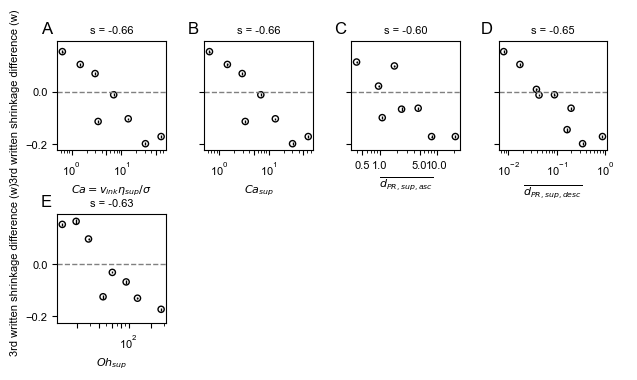

In [134]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## meanT

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.66,3.2e-35
1,$Ca_{sup}$,-0.66,3.2e-35
2,$\overline{d_{PR.sup.asc}}$,-0.67,1.1e-36
3,$\overline{d_{PR.sup.desc}}$,-0.69,6.8e-41
4,$Oh_{sup}$,-0.73,7.4e-48
5,$Re_{sup}$,0.55,7.2e-23
6,$Re_{ink}\times Re_{sup}$,0.54,1.2e-22
7,$\eta_{sup}$,-0.55,7.2e-23
8,$\eta_{ink}\times \eta_{sup}$,-0.54,2.2e-22


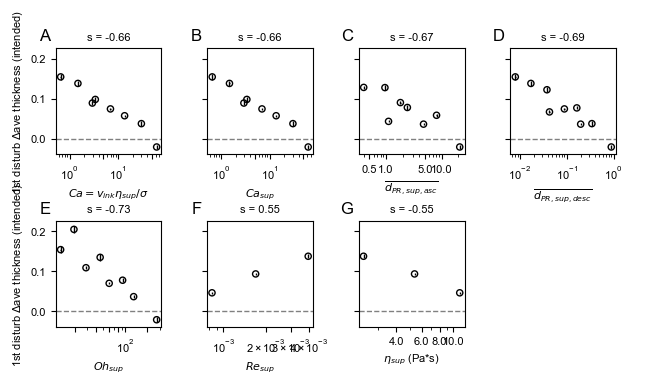

In [136]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.78,7.2e-111


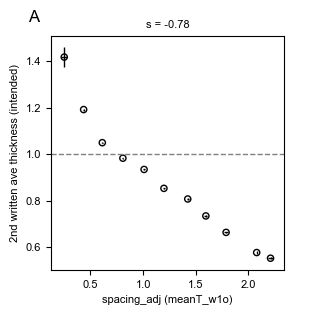

In [137]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'meanT_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,-0.38,1.1e-10


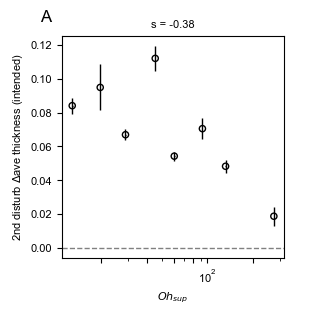

In [155]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.59,1.2e-05
1,$Ca_{sup}$,-0.59,1.2e-05
2,$\overline{d_{PR.sup.asc}}$,-0.55,5.9e-05
3,$\overline{d_{PR.sup.desc}}$,-0.60,8.0e-06
4,$Oh_{sup}$,-0.67,2.4e-07
5,$Re_{sup}$,0.54,8.6e-05
6,$\eta_{sup}$,-0.54,8.6e-05


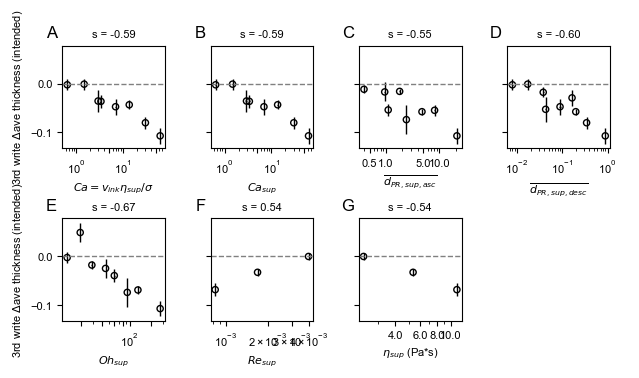

In [157]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_write3', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.62,7.9e-06


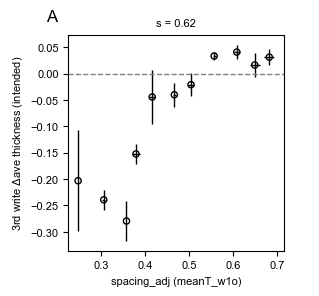

In [161]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.74,1.9e-13


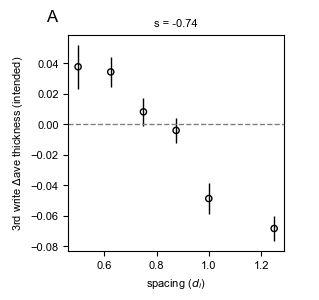

In [165]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>10], 'delta_meanT_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## segments

,variable,Spearman coeff,Spearman p
0,spacing,0.77,2.2e-106


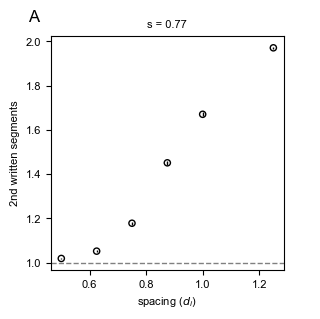

In [90]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [8]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,-0.22,3.7e-02


,variable,Spearman coeff,Spearman p
0,$Ca$,-0.54,1.4e-04
1,$Ca_{sup}$,-0.54,1.4e-04
2,$\overline{d_{PR.sup.asc}}$,-0.56,6.7e-05
3,$\overline{d_{PR.sup.desc}}$,-0.60,1.4e-05
4,$Oh_{sup}$,-0.56,8.6e-05


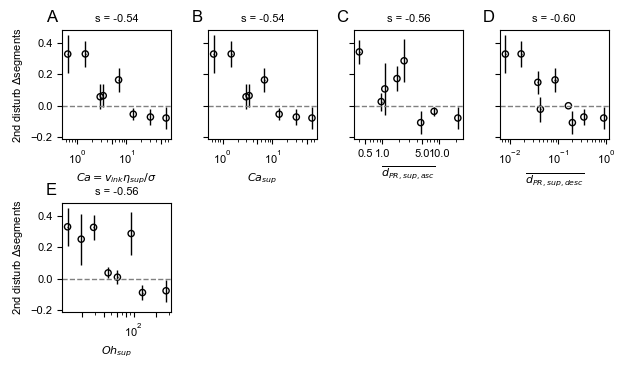

In [101]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'delta_segments_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.46,4.1e-16


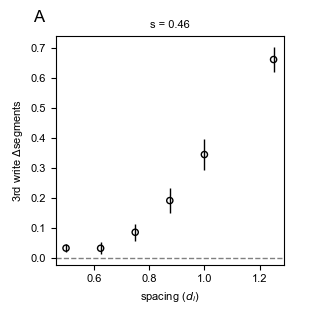

In [107]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_segments_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.77,1.5e-56


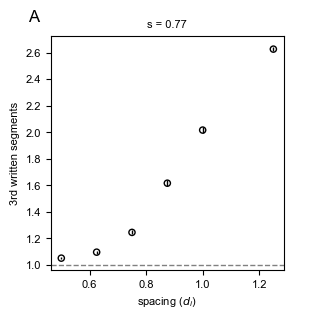

In [108]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## roughness

,variable,Spearman coeff,Spearman p
0,spacing,0.76,1.9e-101


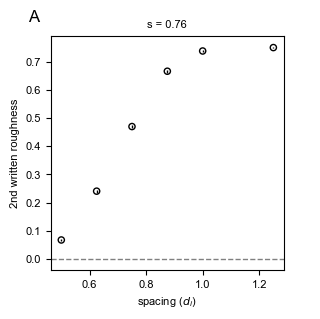

In [167]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [12]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', spacing=0.875, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.61,1.4e-10
1,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,-0.56,5.2e-09
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.61,1.4e-10
3,$\overline{d_{PR.sup.desc}}$,0.54,2.1e-08
4,$\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...,-0.56,5.2e-09
5,$Oh_{sup}$,0.67,3.4e-13
6,$Re_{sup}$,-0.69,3.7e-14
7,$\eta_{sup}$,0.69,3.7e-14


,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,0.54,2.9e-08
1,$Oh_{ink}\times Oh_{sup}$,0.57,4.5e-09
2,$Re_{ink}\times Re_{sup}$,-0.66,1.9e-12
3,$\eta_{ink}\times \eta_{sup}$,0.65,2.0e-12


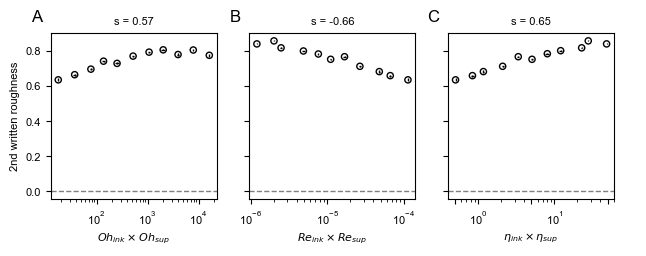

In [168]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.62,9.9e-11
1,$Ca$,0.61,4.2e-10
2,$Ca_{sup}$,0.61,4.2e-10
3,$\overline{d_{PR.sup.asc}}$,0.62,1.3e-10
4,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.62,9.9e-11
5,$\overline{d_{PR.sup.desc}}$,0.67,6.7e-13
6,$Oh_{sup}$,0.67,5.9e-13


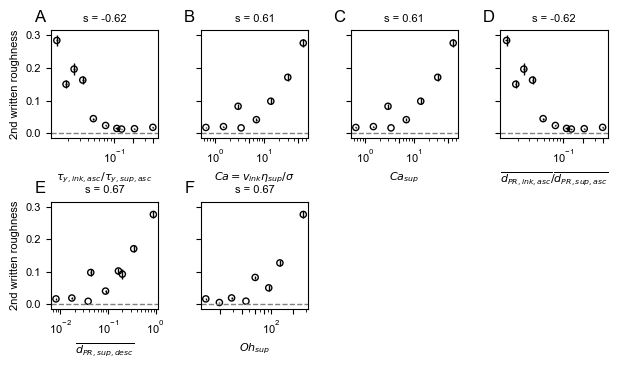

In [169]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.59,7.7e-28


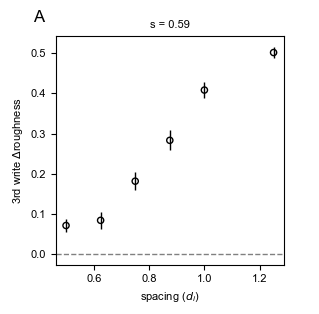

In [170]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## emptiness

,variable,Spearman coeff,Spearman p
0,spacing,0.70,2.2e-80
1,spacing_adj,0.63,4.7e-62


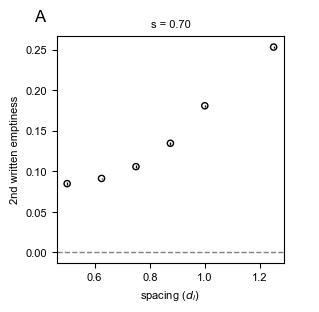

In [172]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [5]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Gta_{ink}/Gta_{sup}$,-0.62,4.0e-11
1,$Ga_{ink}/Ga_{sup}$,-0.64,6.8e-12
2,$Gd_{ink}/Gd_{sup}$,-0.66,8.4e-13
3,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.62,4.2e-11
4,$Ca_{ink}/Ca_{sup}$,-0.68,1.7e-13
5,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.62,4.2e-11
6,$Oh_{ink}/Oh_{sup}$,-0.68,1.9e-13
7,$Re_{ink}/Re_{sup}$,0.68,1.8e-13
8,$Bm_{ink.desc}\times Bm_{sup.desc}$,0.54,3.8e-08
9,$\eta_{ink}/\eta_{sup}$,-0.68,1.7e-13


In [13]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', spacing=0.875, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Gta_{ink}/Gta_{sup}$,-0.64,1.0e-11
1,$Ga_{ink}/Ga_{sup}$,-0.66,5.2e-13
2,$Gd_{ink}/Gd_{sup}$,-0.69,2.3e-14
3,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.68,1.3e-13
4,$Ca_{ink}/Ca_{sup}$,-0.68,9.7e-14
5,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.68,1.3e-13
6,$Oh_{ink}/Oh_{sup}$,-0.68,9.6e-14
7,$Re_{ink}/Re_{sup}$,0.68,1.0e-13
8,$\eta_{ink}/\eta_{sup}$,-0.68,9.7e-14


In [6]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Re_{sup}$,-0.55,3.0e-08
1,$\eta_{sup}$,0.55,3.0e-08


,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.36,2.5e-09


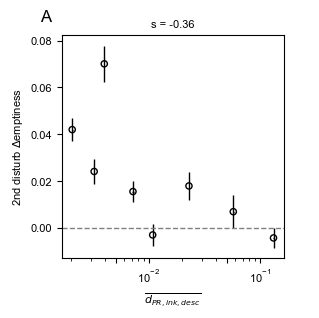

In [175]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.46,7.9e-16


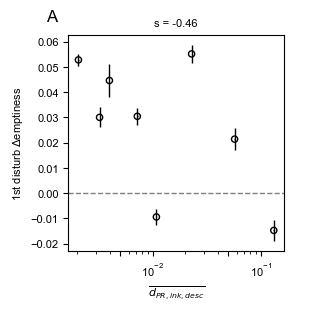

In [176]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Gd_{ink}/Gd_{sup}$,-0.50,4.9e-04


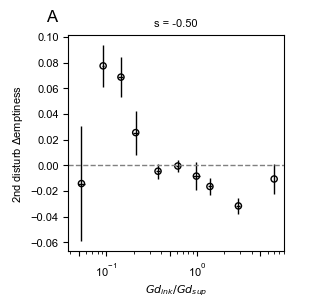

In [274]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Bm_{ink.desc}$,-0.52,3.8e-04
1,$Bm_{ink.desc}\times Bm_{sup.desc}$,-0.51,4.4e-04
2,$Bm_{ink.desc}/Bm_{sup.desc}$,-0.52,3.1e-04


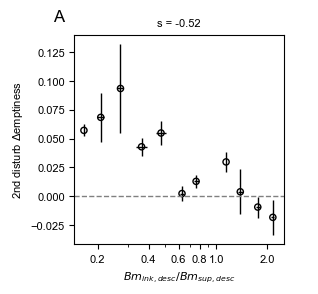

In [275]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yBot

,variable,Spearman coeff,Spearman p
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.48,1.9e-49
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.48,1.9e-49


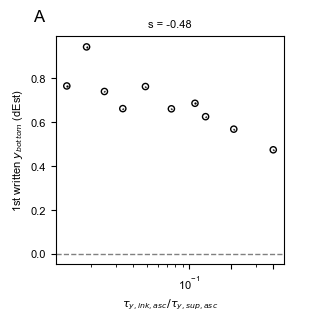

In [184]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'yBot_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.46,7.3e-16
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.46,7.3e-16


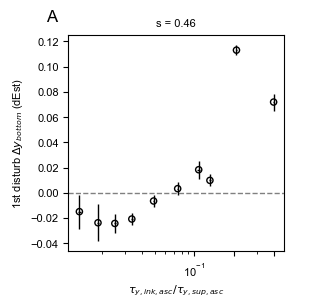

In [185]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.17,4.2e-05


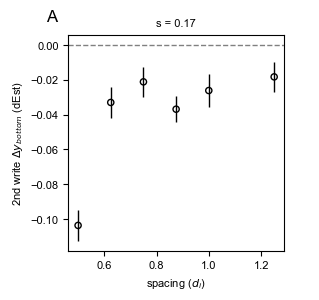

In [201]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [5]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
6,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.38,3.3e-10
3,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.38,3.3e-10


,variable,Spearman coeff,Spearman p
0,spacing,-0.58,5.9e-04


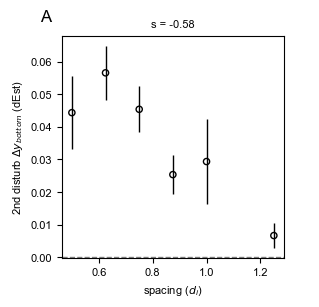

In [210]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yBot_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.58,4.1e-05
1,$Ca_{ink}\times Ca_{sup}$,-0.50,5.2e-04
2,$We_{ink}$,-0.54,1.4e-04
3,$We_{sup}$,-0.51,3.6e-04
4,$We_{ink}\times We_{sup}$,-0.56,9.0e-05


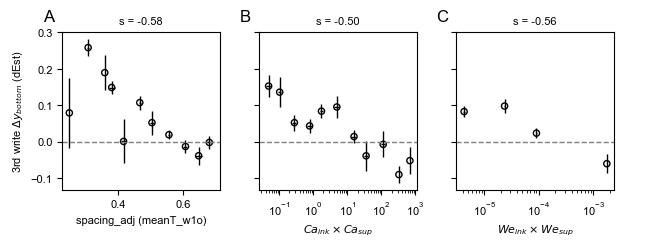

In [213]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [6]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yBot_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.37,2.0e-10


,variable,Spearman coeff,Spearman p
0,spacing,-0.55,4.0e-04


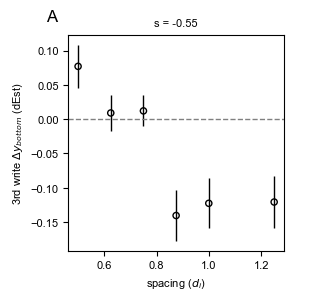

In [216]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yBot_write3',logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yTop

In [7]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'yTop_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.50,2.7e-53
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.50,2.7e-53


,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.54,5.2e-22
1,$Ca$,-0.53,4.0e-21
2,$Ca_{sup}$,-0.53,4.0e-21
3,$\overline{d_{PR.sup.asc}}$,-0.53,3.5e-21
4,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.54,5.2e-22
5,$\overline{d_{PR.sup.desc}}$,-0.55,3.6e-23
6,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.51,1.7e-19
7,$Oh_{sup}$,-0.53,3.6e-21


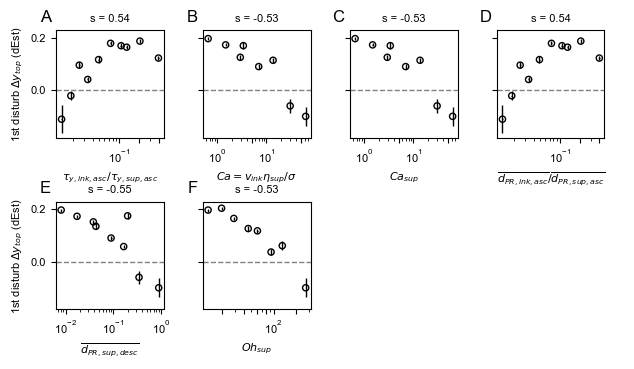

In [186]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.56,1.2e-03
1,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.51,3.2e-03


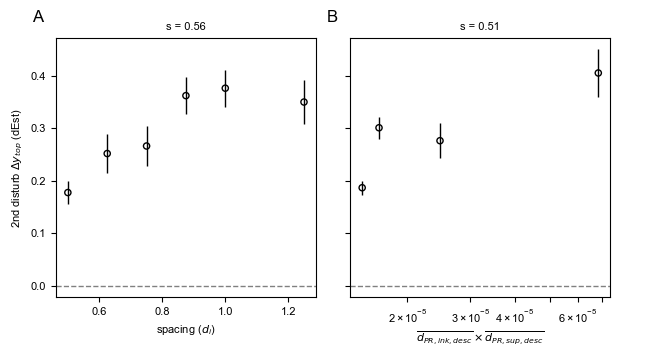

In [209]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yTop_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

In [11]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.32,1.2e-07


,variable,Spearman coeff,Spearman p
3,$Bm_{ink.asc}/Bm_{sup.asc}$,0.47,7.1e-17


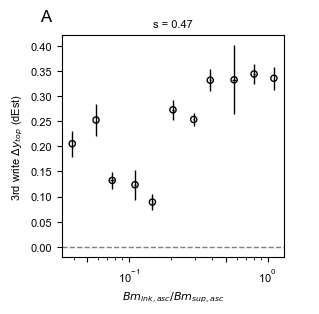

In [211]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yTop_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## yc

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.65,7.9e-35
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.65,7.9e-35
2,$\overline{d_{PR.sup.desc}}$,-0.53,1.3e-21
3,$Oh_{sup}$,-0.55,3.6e-23


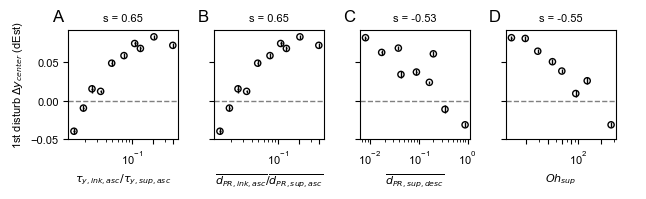

In [189]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.59,6.8e-04
1,$Ca$,0.58,8.2e-04
2,$Ca_{sup}$,0.58,8.2e-04
3,$\overline{d_{PR.sup.asc}}$,0.58,8.2e-04
4,$\overline{d_{PR.sup.desc}}$,0.58,8.2e-04
5,$We_{sup}$,0.58,8.2e-04
6,$Oh_{sup}$,0.58,8.2e-04


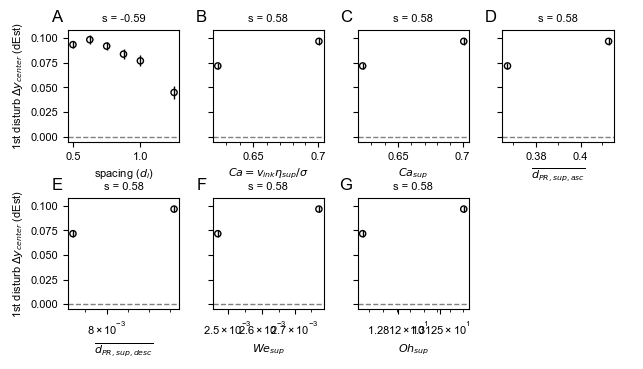

In [190]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yc_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.60,5.8e-08


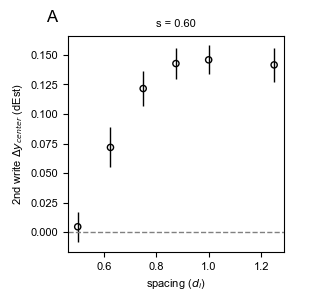

In [191]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_yc_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$Re_{sup}$,-0.57,9.2e-09
1,$\eta_{sup}$,0.57,9.2e-09


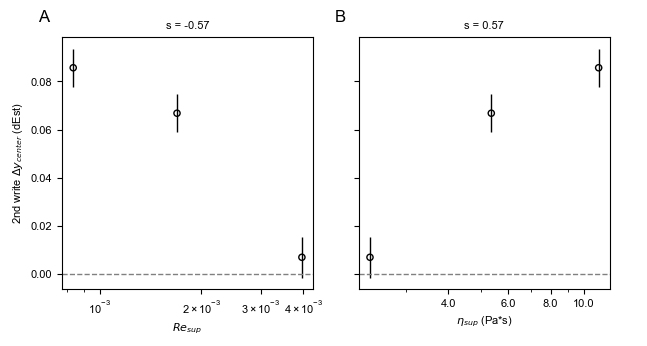

In [193]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write2', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
1,$Ca_{ink}$,-0.48,1.4e-06


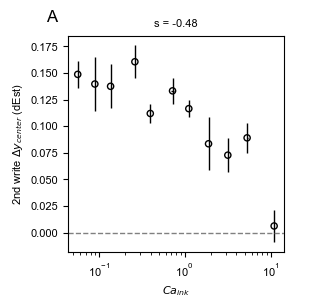

In [194]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write2', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.55,3.1e-22
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.55,3.1e-22


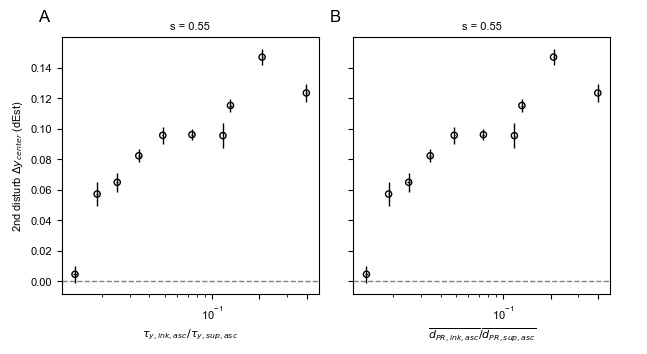

In [204]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,-0.47,3.7e-17


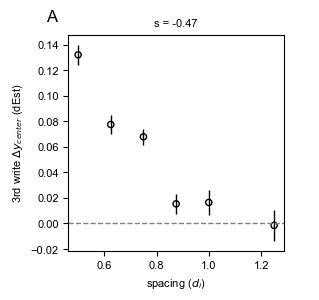

In [221]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write3',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.61,1.0e-05
1,$Ca_{ink}$,-0.60,1.5e-05
2,$Ca_{ink}\times Ca_{sup}$,-0.57,5.4e-05
3,$\overline{d_{PR.ink.asc}}$,-0.58,3.1e-05
4,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.56,9.1e-05
5,$We_{ink}$,-0.60,2.0e-05
6,$We_{sup}$,-0.60,2.0e-05
7,$We_{ink}\times We_{sup}$,-0.62,6.8e-06
8,$Oh_{ink}$,-0.55,1.2e-04
9,$Oh_{ink}\times Oh_{sup}$,-0.54,1.4e-04


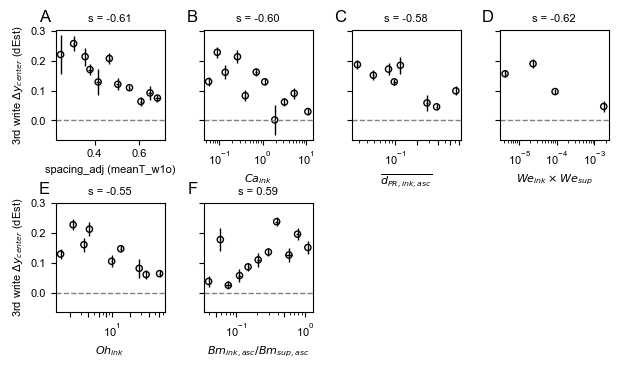

In [224]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## space_b

,variable,Spearman coeff,Spearman p
0,spacing,0.91,4.3e-107
1,spacing_adj,0.84,2.5e-73


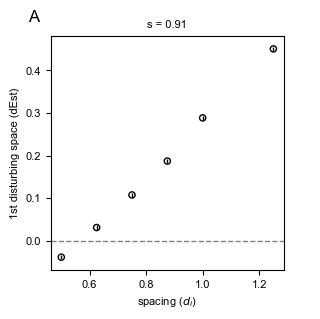

In [230]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.51,3.2e-04


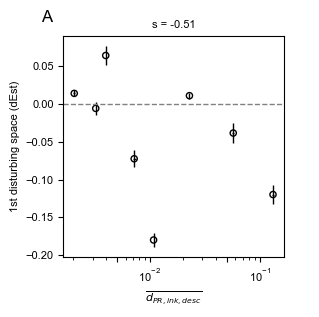

In [232]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'space_b_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.77,9.4e-53


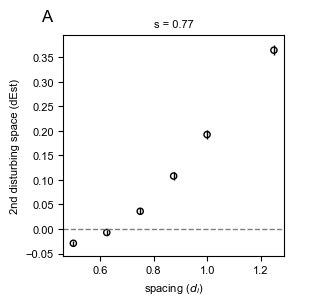

In [265]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.62,5.8e-06


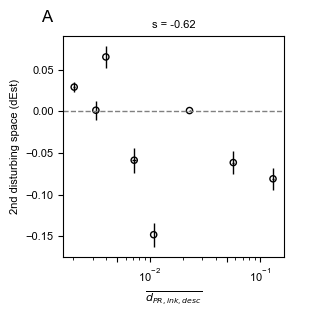

In [266]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## dyflr

,variable,Spearman coeff,Spearman p
0,$tGd_{ink}/tGd_{sup}$,0.54,1.2e-04
1,$Ga_{ink}/Ga_{sup}$,0.52,2.3e-04
2,$Gd_{ink}/Gd_{sup}$,0.54,1.1e-04
3,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,0.57,3.3e-05
4,$\tau_{y.ink.desc}/\tau_{y.sup.desc}$,0.53,1.3e-04
5,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,0.57,3.3e-05
6,$\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...,0.53,1.3e-04
7,$Oh_{sup}$,-0.58,2.0e-05
8,$Re_{sup}$,0.60,1.1e-05
9,$\eta_{sup}$,-0.60,1.1e-05


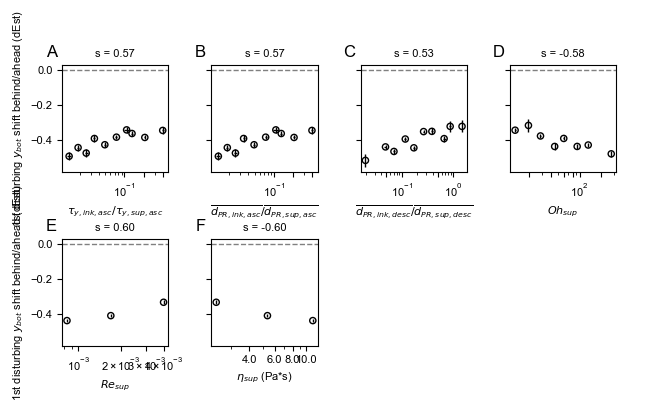

In [246]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dyflr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.80,2.2e-62


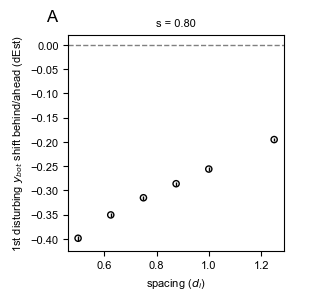

In [247]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,spacing,0.60,9.9e-27


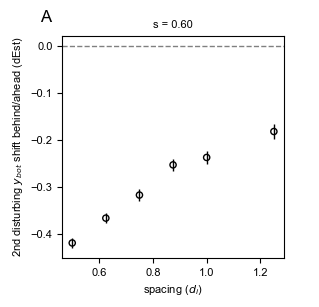

In [263]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

## dy0lr

,variable,Spearman coeff,Spearman p
0,spacing,0.41,1.1e-12


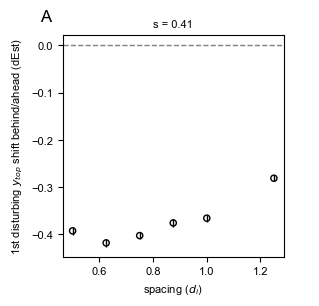

In [254]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dy0lr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$We_{sup}$,0.54,1.0e-04
1,$We_{ink}\times We_{sup}$,0.51,3.0e-04
2,$Re_{sup}$,0.50,3.7e-04
3,$Bm_{ink.asc}/Bm_{sup.asc}$,-0.52,1.9e-04
4,$\eta_{sup}$,-0.50,3.7e-04


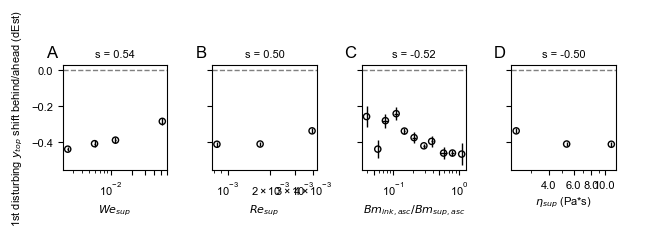

In [255]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dy0lr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.asc}}$,0.51,3.7e-04


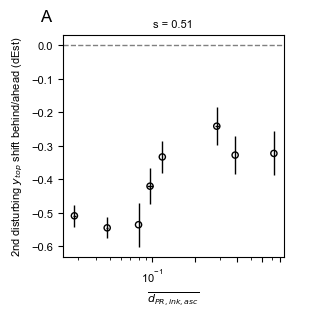

In [259]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dy0lr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)

,variable,Spearman coeff,Spearman p
3,$tGd_{ink}/tGd_{sup}$,0.35,3.8e-09


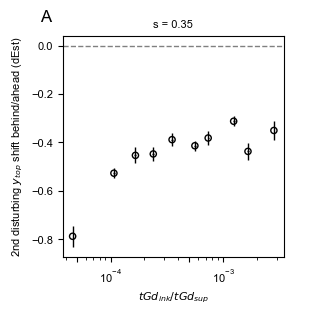

In [262]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dy0lr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)